<a href="https://colab.research.google.com/github/skethavi/churn_prediction/blob/main/Churn_Predction_in_Telecom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
telecom_cust=pd.read_csv("telecom.txt")

In [3]:
telecom_cust.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
telecom_cust.shape

(7043, 21)

In [5]:
telecom_cust.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [6]:
telecom_cust.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
telecom_cust.TotalCharges=pd.to_numeric(telecom_cust.TotalCharges,errors='coerce')
telecom_cust.isnull().sum().values

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, 11,  0])

In [8]:
telecom_cust.dropna(inplace=True)
telecom_cust.isnull().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Data Preparation and Visualisations

In [9]:
df2=telecom_cust.iloc[:,1:]
df2['Churn'].replace(to_replace="Yes", value=1, inplace=True)
df2['Churn'].replace(to_replace="No",  value=0, inplace=True)

In [10]:
df_dummies=pd.get_dummies(df2)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


Text(0.5, 1.0, 'GENDER DISTRIBUTION')

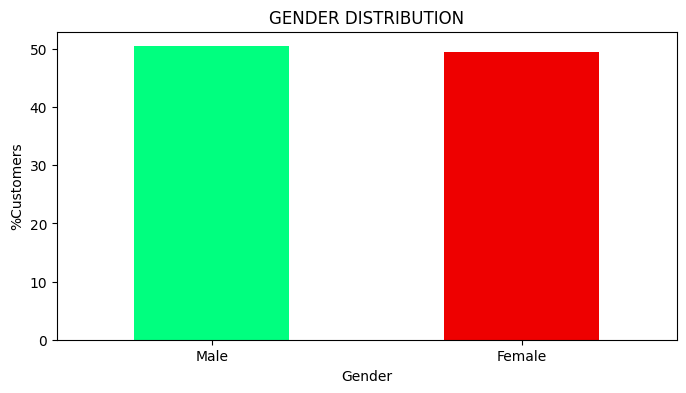

In [11]:
plt.figure(figsize=(8,4))
colors = ["#00FF7F","#EE0000"]
ax = (telecom_cust['gender'].value_counts()*100.0/len(telecom_cust)).plot(kind='bar', stacked=True, rot=0 , color=colors)
ax.set_xlabel("Gender")
ax.set_ylabel("%Customers")
ax.set_title("GENDER DISTRIBUTION")

Text(0.5, 1.0, 'No of Customers by Contract Type')

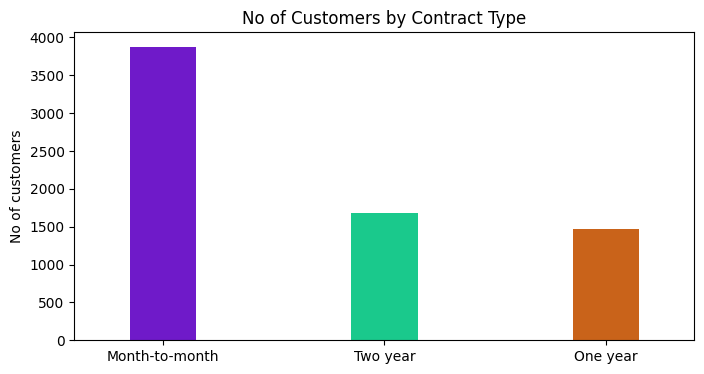

In [12]:
plt.figure(figsize=(8,4))
ax = telecom_cust['Contract'].value_counts().plot(kind= 'bar',rot = 0, width=0.3, color=["#6f1ac9","#1ac98c","#c9631a"])
ax.set_ylabel('No of customers')
ax.set_title('No of Customers by Contract Type')

Text(0.5, 1.0, 'Chrun Distribution')

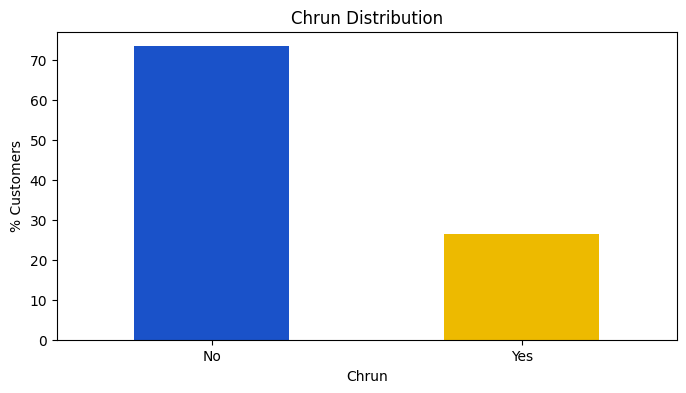

In [13]:
plt.figure(figsize=(8,4))
ax = (telecom_cust['Churn'].value_counts()*100/len(telecom_cust)).plot(kind='bar',stacked = True, rot = 0, color=["#1a52c9","#edba00"])
ax.set_xlabel("Chrun")
ax.set_ylabel('% Customers')
ax.set_title('Chrun Distribution')

<Axes: xlabel='Churn', ylabel='tenure'>

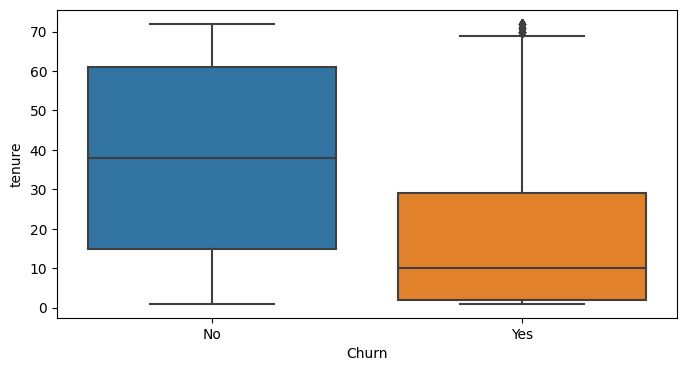

In [14]:
plt.figure(figsize=(8,4))
sns.boxplot(x = telecom_cust.Churn, y = telecom_cust.tenure)

# Logistic Regression Accuracy

In [15]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [16]:
x=df_dummies.drop(columns = ['Churn'])
y=df_dummies['Churn'].values
features = x.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(x)
x=pd.DataFrame(scaler.transform(x))
x.columns = features

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=101)

In [18]:
model=LogisticRegression()
result=model.fit(x_train, y_train)

In [21]:
prediction_test = model.predict(x_test)
print(metrics.accuracy_score(y_test, prediction_test))

0.8075829383886256
